#### Part 3 Basic Stat Overview and Regression Analysis
This part


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import time
import datetime
import math
import pandas as pd
import plotly.express as px
import re

In [3]:
cdc_20_21_stat = pd.read_csv(r'/mnt/d/OneDrive - University College London/T1/CASA0007/0. Research Project/cleaned_data/combined_df.csv', encoding = "UTF-8")

In [4]:
# drop the location column, for corr analysis:
cdc_regression = cdc_20_21_stat.drop(columns=['Location'])

In [5]:
describe_df = cdc_regression.describe()

In [9]:
describe_df.to_csv(r'/mnt/d/OneDrive - University College London/T1/CASA0007/0. Research Project/cleaned_data/description_cols.csv', index = False)

In [22]:
cdc_regression.var(axis = 0)

All teeth lost among adults aged >=65 years                                                                                                                                                       15.190014
Cervical cancer screening among adult women aged 21-65 years                                                                                                                                       5.695312
Fecal occult blood test, sigmoidoscopy, or colonoscopy among adults aged 50-75 years                                                                                                              21.837299
Mammography use among women aged 50-74 years                                                                                                                                                      15.754218
Older adult men aged >=65 years who are up to date on a core set of clinical preventive services: Flu shot past year, PPV shot ever, Colorectal cancer screening                        

#### Basic Plots

In [31]:
pservice_col = ['Cervical cancer screening among adult women aged 21-65 years',
       'Fecal occult blood test, sigmoidoscopy, or colonoscopy among adults aged 50-75 years',
       'Mammography use among women aged 50-74 years',
       'Older adult men aged >=65 years who are up to date on a core set of clinical preventive services: Flu shot past year, PPV shot ever, Colorectal cancer screening',
       'Older adult women aged >=65 years who are up to date on a core set of clinical preventive services: Flu shot past year, PPV shot ever, Colorectal cancer screening, and Mammogram past 2 years',
       'Visits to dentist or dental clinic among adults aged >=18 years',
       'Cholesterol screening among adults aged >=18 years',
       'Taking medicine for high blood pressure control among adults aged >=18 years with high blood pressure',
       'Visits to doctor for routine checkup within the past year among adults aged >=18 years']


In [29]:
health_outcomes_col = ['All teeth lost among adults aged >=65 years',
       'Arthritis among adults aged >=18 years',
       'Cancer (excluding skin cancer) among adults aged >=18 years',
       'Coronary heart disease among adults aged >=18 years',
       'Current asthma among adults aged >=18 years',
       'Diagnosed diabetes among adults aged >=18 years',
       'Mental health not good for >=14 days among adults aged >=18 years',
       'Depression among adults aged >=18 years',
       'High blood pressure among adults aged >=18 years',
       'High cholesterol among adults aged >=18 years who have been screened in the past 5 years',
       'Obesity among adults aged >=18 years',
       'Physical health not good for >=14 days among adults aged >=18 years',
       'Stroke among adults aged >=18 years']

In [32]:
risky_beh = ['Sleeping less than 7 hours among adults aged >=18 years',
       'Binge drinking among adults aged >=18 years',
       'Current smoking among adults aged >=18 years',
       'No leisure-time physical activity among adults aged >=18 years']

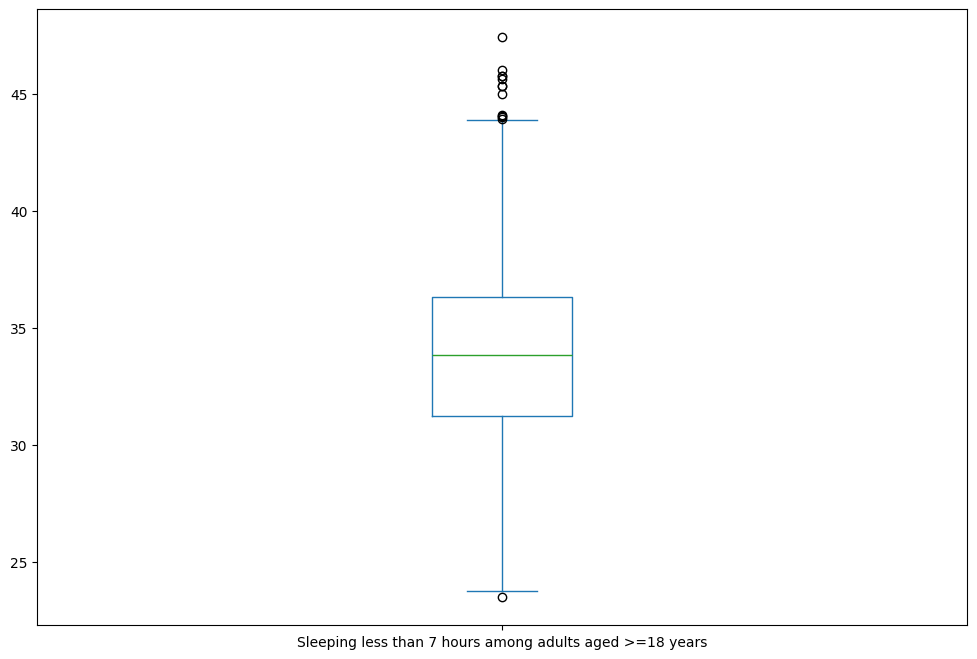

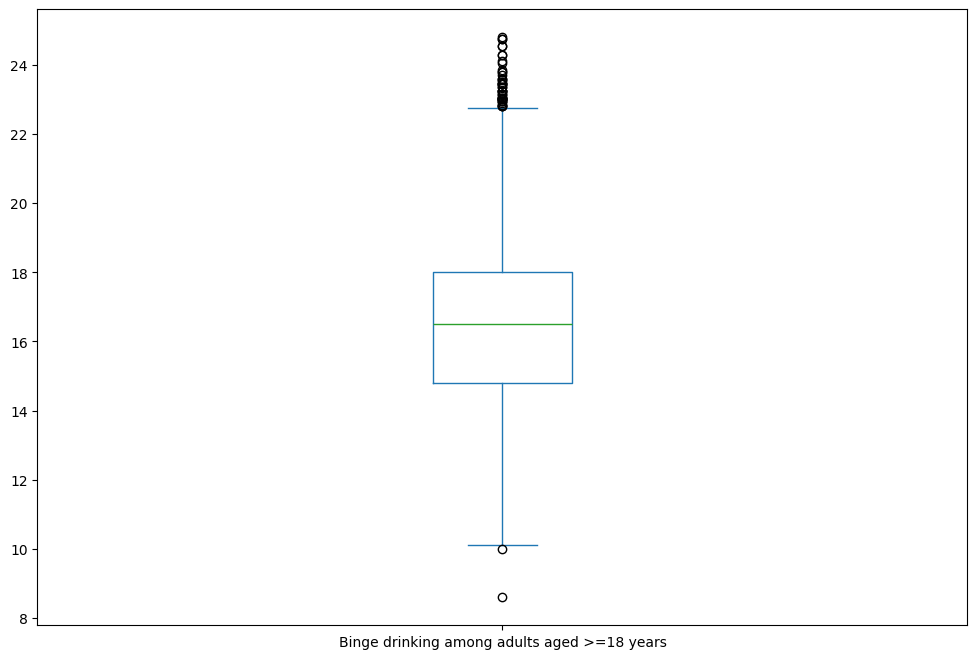

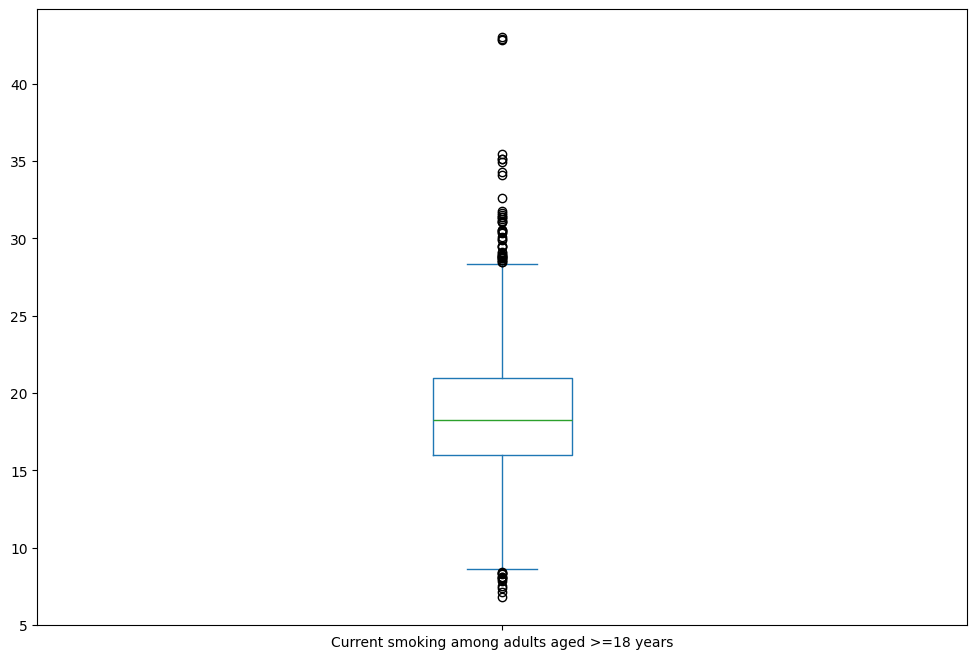

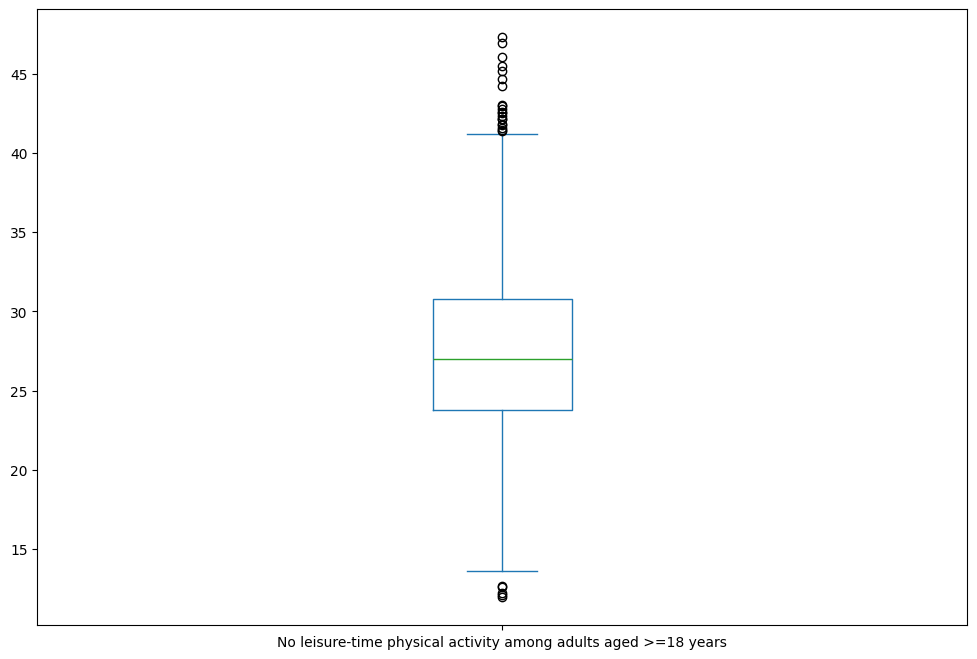

In [33]:
for column in risky_beh:
    fig, axs = plt.subplots(figsize = (12,8))  # Adjust the subplot grid to 4x3 and set the figure size
    cdc_regression.plot(kind='box', y=column, ax =axs)
    filename = column+".png"
    plt.savefig(filename, dpi=300, bbox_inches='tight')

Homogeneity of Variance Test (HOV)


Interpret results:

    Null hypothesis: Equal variances across groups.
    p-value < 0.05: Reject null hypothesis, indicating unequal variances.
    p-value >= 0.05: Fail to reject null hypothesis, suggesting equal variances.

Additional considerations:

    Visualizations: Use box plots or other visualizations to check variance patterns before testing.
    Alternative tests: Consider Bartlett's test for normally distributed data, but be cautious as it's more sensitive to normality violations.
    Handling unequal variances: If HOV test suggests unequal variances, use statistical methods that account for this (e.g., Welch's t-test instead of Student's t-test).

Remark:

    HOV tests are important assumptions for many statistical methods.
    Choose the appropriate test based on data distribution and research question.
    Interpret results carefully in the context of your analysis.



In [ ]:
import pandas as pd  # For data manipulation
from scipy.stats import levene  # For Levene's test

stat, p = levene(values[groups == 'group1'],  # Values for group 1
                 values[groups == 'group2'],  # Values for group 2
                 # ... add more groups if needed
                 center='median')  # Recommended for non-normal data

print("Statistic:", stat)
print("p-value:", p)

#### Regression Analysis
Multi-linear regression

In [34]:
import statsmodels.formula.api as smf

In [ ]:
# First, perform a simple linear regression analysis on the effect of depth on temperature

reg_tdegc_depthm = smf.ols(formula='T_degC ~ Depthm',data= df_seawater_data_cleaned).fit()

# And this gives a big summary of the results:
print(reg_tdegc_depthm.summary())

In [ ]:
# Group according to 'Month' and calculate the average value of each group
monthly_avg_temp2 = df_seawater_data_cleaned3_seperate2.groupby('Month')['T_degC'].mean()

# Draw a line chart with the month on the x-axis and the average temperature on the y-axis
monthly_avg_temp2.plot(kind='line', figsize=(10, 5))

# Set chart titles and axis labels
plt.title('Average Sea Water Temperature per Month')
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')

# Show the chart
plt.show()

In [ ]:
import statsmodels.api as sm

smoking and tobacco sales in states, counties, etc.